Data set loading....

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (use raw string `r"..."` to prevent backslash issues)
df = pd.read_csv(r"D:\An EDA Project\StudentsPerformance.csv")

# Quick overview
print("Shape of dataset:", df.shape)
print("\nInfo:\n")
print(df.info())
print("\nFirst 5 rows:\n")
print(df.head())


Shape of dataset: (1000, 8)

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

First 5 rows:

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  fema

Plot Score Distributions (Numerical Columns)

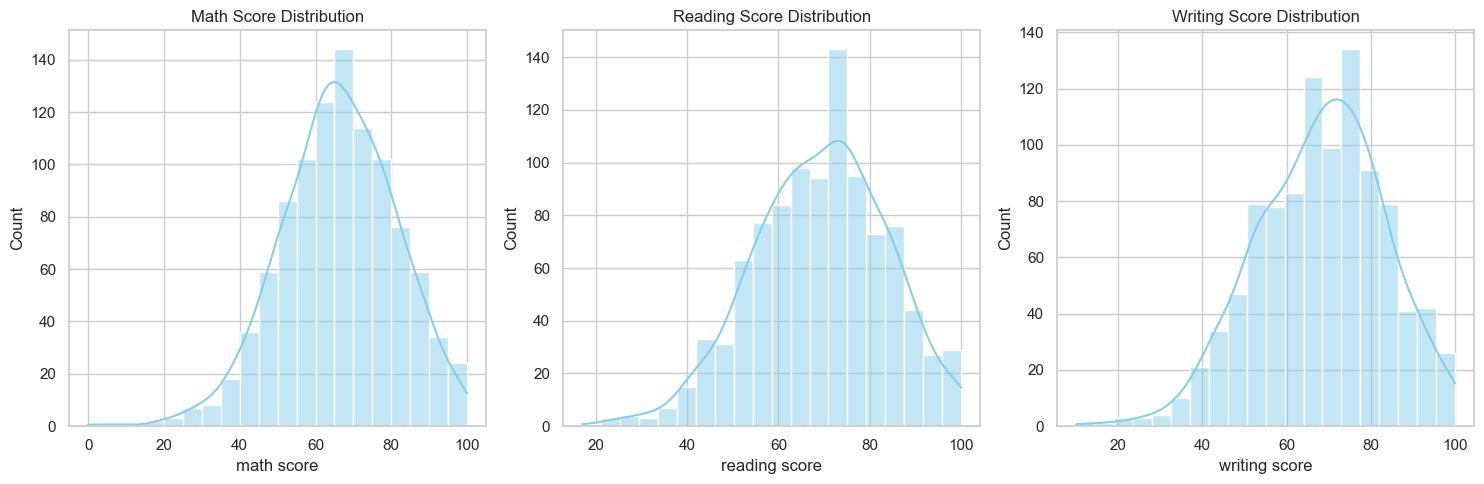

In [7]:
import os
os.makedirs("visuals", exist_ok=True)

plt.figure(figsize=(15, 5))
for i, col in enumerate(score_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], bins=20, kde=True, color='skyblue')
    plt.title(f'{col.title()} Distribution')

plt.tight_layout()
plt.savefig("visuals/score_distribution.png")
plt.show()



Plot Bar Charts for Categorical Columns

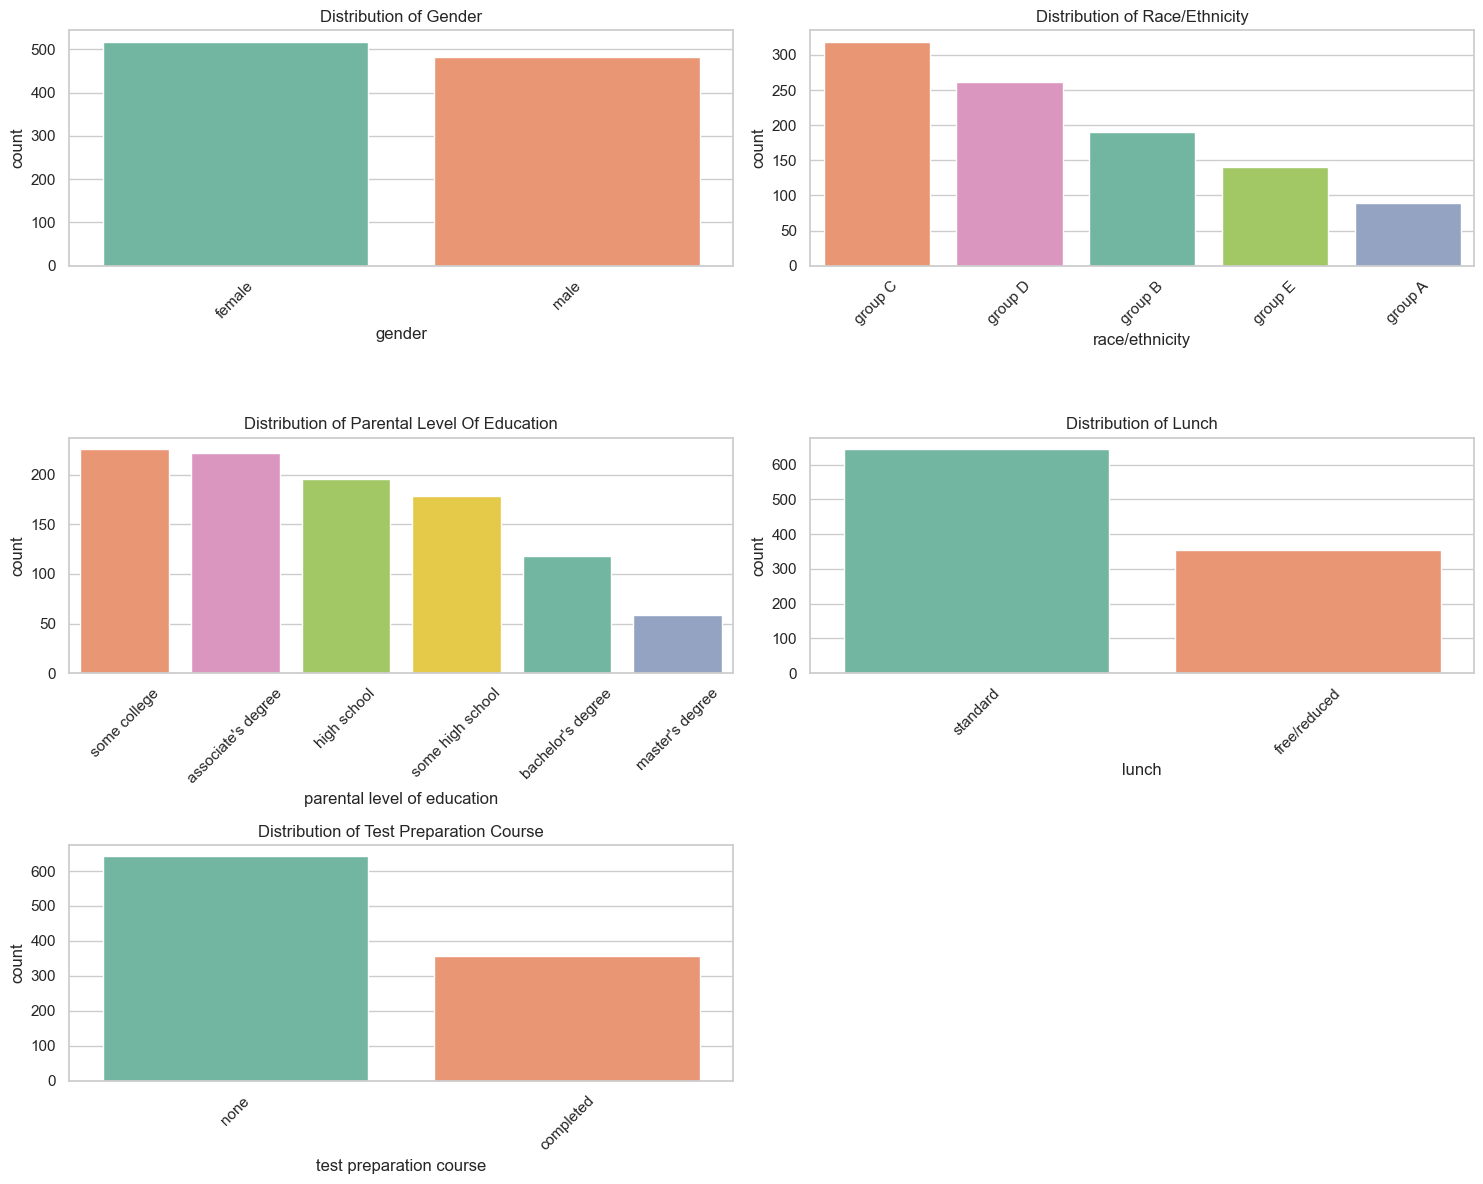

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))

for i, col in enumerate(cat_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(
        data=df,
        x=col,
        hue=col,                 # Added to avoid future warnings
        palette="Set2",
        order=df[col].value_counts().index,
        legend=False             # Avoid duplicated legends
    )
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col.title()}')

plt.tight_layout()

# Make sure the "visuals" folder exists before saving
import os
os.makedirs("visuals", exist_ok=True)

plt.savefig("visuals/categorical_counts.png")
plt.show()



Gender vs Scores

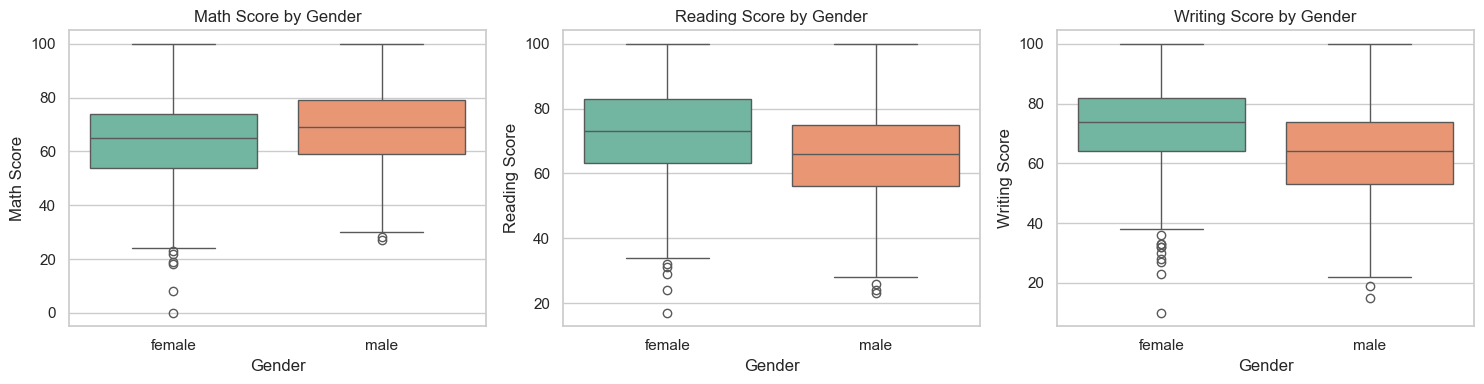

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

score_cols = ['math score', 'reading score', 'writing score']

plt.figure(figsize=(15, 4))
for i, col in enumerate(score_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x='gender', y=col, hue='gender', palette='Set2', legend=False)
    plt.title(f"{col.title()} by Gender")
    plt.xlabel('Gender')
    plt.ylabel(col.title())
plt.tight_layout()
plt.savefig("visuals/gender_vs_scores.png")
plt.show()


Parental Education vs. Scores

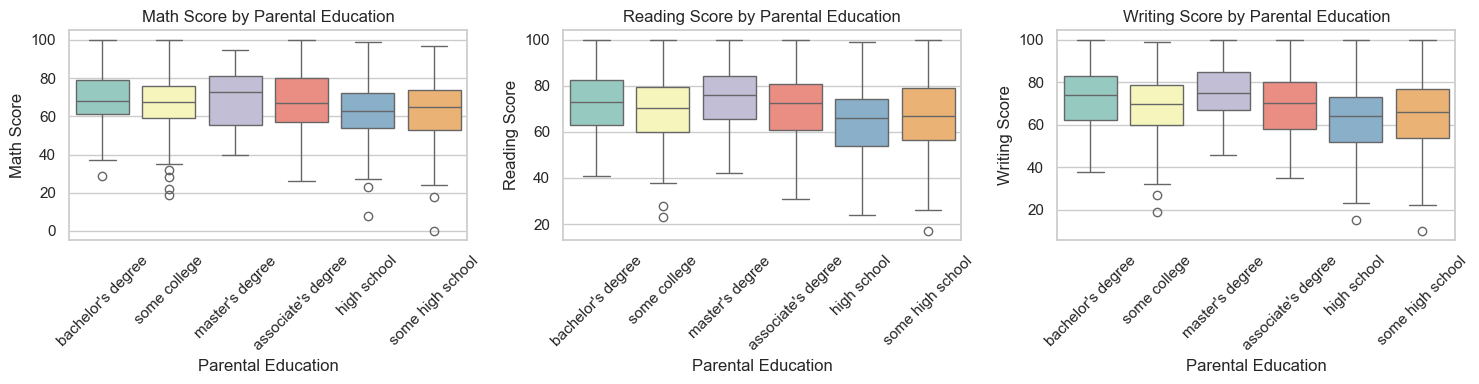

In [15]:
plt.figure(figsize=(15, 4))
for i, col in enumerate(score_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x='parental level of education', y=col, hue='parental level of education', palette='Set3', legend=False)
    plt.title(f"{col.title()} by Parental Education")
    plt.xlabel('Parental Education')
    plt.ylabel(col.title())
    plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("visuals/parental_education_vs_scores.png")
plt.show()


Test Preparation Course vs Scores

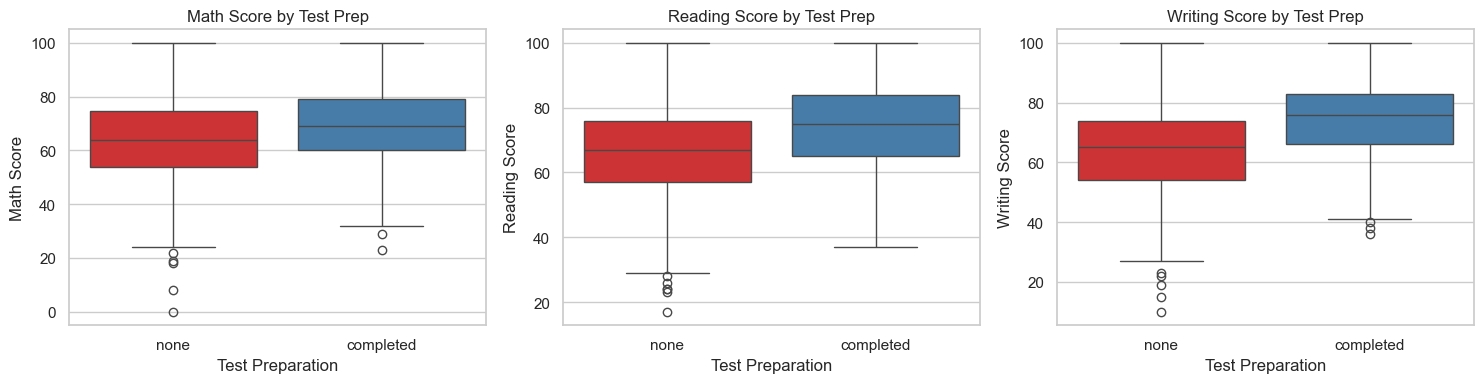

In [16]:
plt.figure(figsize=(15, 4))
for i, col in enumerate(score_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x='test preparation course', y=col, hue='test preparation course', palette='Set1', legend=False)
    plt.title(f"{col.title()} by Test Prep")
    plt.xlabel('Test Preparation')
    plt.ylabel(col.title())
plt.tight_layout()
plt.savefig("visuals/testprep_vs_scores.png")
plt.show()


Correlation Between Scores

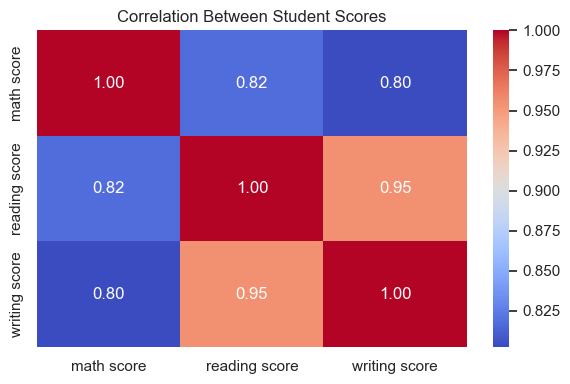

In [17]:
plt.figure(figsize=(6, 4))
score_corr = df[score_cols].corr()
sns.heatmap(score_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Student Scores")
plt.tight_layout()
plt.savefig("visuals/score_correlation_heatmap.png")
plt.show()


In [34]:
import os
# Key insights
insights = [
    "1. Students whose parents have a master's degree tend to perform better, especially in math.",
    "2. Test preparation course is linked with higher scores in reading and writing.",
    "3. Males tend to score higher in math; females in reading and writing.",
    "4. Students with standard lunch generally outperform those with free/reduced lunch.",
    "5. Strong correlation exists among all three subjects (math, reading, writing)."
    "6. Students who completed the test preparation course scored higher across all subjects.",
    "7. The distribution of scores is generally normal, with some outliers.",
    "8. The majority of students are from a standard lunch background, which correlates with higher scores."
]
# Save to text file
with open("key_insights.txt", "w") as f:
    for insight in insights:
        f.write(insight + "\n")

print("✅ Key insights saved to 'key_insights.txt'")


✅ Key insights saved to 'key_insights.txt'
